In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [83]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']
print(x.head())
print(y.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [86]:
x.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


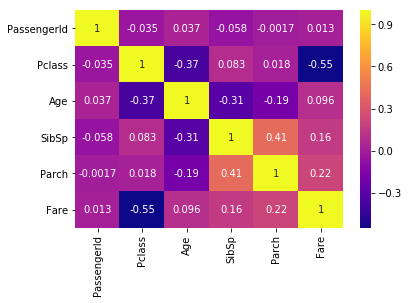

In [87]:
sns.heatmap(x.corr(),annot=True, cmap='plasma')

In [88]:
x.drop(['PassengerId','Ticket'],axis=1, inplace=True)
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [89]:
def getTitle(x):
    t=x.split()
    #
    for k in t:
        if k[-1] =='.':
            return k.strip('.')
    return 'Not find'
x['Title']=x["Name"].apply(getTitle)
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr


In [90]:
x['Title'].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

In [91]:
def getTitles(name):
    if pd.notna(name):
        k=re.findall(r'[a-zA-Z]+[.]',name)
        title = k[0]
        #print(k)
        if title in ['Mr.','Miss.','Mrs.','Master.']:
            return title
        else:
            return 'Other'
    else:
        return np.nan

In [92]:
x['Title']=x["Name"].apply(getTitles)
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.


In [93]:
def getDeck(cabin):
    if pd.notna(cabin):
        k=cabin[0]
        
        return k
    else:
        return np.nan

In [94]:
x['Deck']=x['Cabin'].apply(getDeck)

In [95]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.,NaN
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.,NaN
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.,C
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.,NaN


In [96]:
x.isna().mean()

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
Title       0.000000
Deck        0.771044
dtype: float64

In [99]:
from sklearn.impute import SimpleImputer
impcabin = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='X') 
x['Imp_Deck'] = pd.DataFrame(impcabin.fit_transform(x[['Deck']]))

x.head()
x.isna().mean()

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
Title       0.000000
Deck        0.771044
Imp_Deck    0.000000
dtype: float64

In [101]:
from sklearn.impute import SimpleImputer
siembarked = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='X') 
x['Imp_Embarked'] = pd.DataFrame(siembarked.fit_transform(x[['Embarked']]))
x.isna().mean()

Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.198653
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin           0.771044
Embarked        0.002245
Title           0.000000
Deck            0.771044
Imp_Deck        0.000000
Imp_Embarked    0.000000
dtype: float64

In [104]:
imp_age = SimpleImputer(missing_values=np.nan, strategy='median') 
x['Imp_Age'] = pd.DataFrame(imp_age.fit_transform(x[['Age']]))
x.isna().mean()

Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.198653
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin           0.771044
Embarked        0.002245
Title           0.000000
Deck            0.771044
Imp_Deck        0.000000
Imp_Embarked    0.000000
Imp_Age         0.000000
dtype: float64

In [105]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,Imp_Deck,Imp_Embarked,Imp_Age
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.,NaN,X,S,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.,C,C,C,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.,NaN,X,S,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.,C,C,S,35.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.,NaN,X,S,35.0


In [110]:
from sklearn.preprocessing import KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile') # read documentation for encode and strategy
x['kbinAge'] = pd.DataFrame(kbd.fit_transform(x[['Imp_Age']]))

In [112]:
type(x['Imp_Age'])

pandas.core.series.Series

In [115]:
x[['Imp_Age']].head()

,Imp_Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [116]:
type(x[['Imp_Age']])

pandas.core.frame.DataFrame

In [117]:
x['kbinFare'] = pd.DataFrame(kbd.fit_transform(x[['Fare']]))

In [118]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Deck,Imp_Deck,Imp_Embarked,Imp_Age,kbinAge,kbinFare
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.,NaN,X,S,22.0,1.0,0.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.,C,C,C,38.0,4.0,4.0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.,NaN,X,S,26.0,1.0,1.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.,C,C,S,35.0,3.0,4.0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.,NaN,X,S,35.0,3.0,1.0


In [124]:
x.drop(['Name','Age','Imp_Age','Fare','Cabin','Embarked','Deck'],axis=1,inplace=True)

In [126]:
x.head()

,Pclass,Sex,SibSp,Parch,Title,Imp_Deck,Imp_Embarked,kbinAge,kbinFare
0,3,male,1,0,Mr.,X,S,1.0,0.0
1,1,female,1,0,Mrs.,C,C,4.0,4.0
2,3,female,0,0,Miss.,X,S,1.0,1.0
3,1,female,1,0,Mrs.,C,S,3.0,4.0
4,3,male,0,0,Mr.,X,S,3.0,1.0


In [131]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, dtype=int)
categorivals=['Pclass','Sex','Title','Imp_Deck','Imp_Embarked','kbinAge','kbinFare']
xcat = pd.DataFrame(ohe.fit_transform(x[categorivals]), 
                    columns=ohe.get_feature_names())
x=pd.concat([x,xcat],axis=1)
x.drop(categorivals,axis=1, inplace=True)
x.head()

,SibSp,Parch,x0_1,x0_2,x0_3,x1_female,x1_male,x2_Master.,x2_Miss.,x2_Mr.,...,x4_X,x5_0.0,x5_1.0,x5_3.0,x5_4.0,x6_0.0,x6_1.0,x6_2.0,x6_3.0,x6_4.0
0,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [132]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [133]:
from sklearn.ensemble import RandomForestClassifier                                                                                     
rfc = RandomForestClassifier(n_estimators=100, 
                             max_features='auto', bootstrap=True,
                             max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight=None)  

In [135]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred))
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

0.8268156424581006
[[101  16]
 [ 15  47]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       117
           1       0.75      0.76      0.75        62

   micro avg       0.83      0.83      0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



# Week 5 exercise 6a


In [174]:
df = pd.read_csv('train.csv')

In [175]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
def getDeck(cabin):
    if pd.notna(cabin):
        return cabin[0]
    else:
        return np.nan

In [177]:
df['Deck'] = df['Cabin'].apply(getDeck)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [178]:
df=df[['Survived','Pclass','Sex','Age','Deck']]
df.head()

,Survived,Pclass,Sex,Age,Deck
0,0,3,male,22.0,NaN
1,1,1,female,38.0,C
2,1,3,female,26.0,NaN
3,1,1,female,35.0,C
4,0,3,male,35.0,NaN


In [179]:
# set up data
X=df.drop(['Survived'],axis=1)
y=df['Survived']
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=1)

#following code to deal with setting with copy warning
Xtrain=Xtrain.copy()
Xtest=Xtest.copy()
ytrain=ytrain.copy()
ytest=ytest

In [180]:
from sklearn.impute import SimpleImputer
sideck = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='X')
Xtrain['imDeck']=pd.DataFrame(sideck.fit_transform(Xtrain[['Deck']]),index=Xtrain.index)
Xtrain.head()

,Pclass,Sex,Age,Deck,imDeck
301,3,male,NaN,NaN,X
309,1,female,30.0,E,E
516,2,female,34.0,F,F
120,2,male,21.0,NaN,X
570,2,male,62.0,NaN,X


In [181]:
from sklearn.impute import SimpleImputer
siage=SimpleImputer(missing_values=np.nan,strategy='median')
Xtrain['impAge']=pd.DataFrame(siage.fit_transform(Xtrain[['Age']]),index=Xtrain.index)
Xtrain.sample(frac=0.01)

,Pclass,Sex,Age,Deck,imDeck,impAge
755,2,male,0.67,NaN,X,0.67
765,1,female,51.00,D,D,51.00
424,3,male,18.00,NaN,X,18.00
480,3,male,9.00,NaN,X,9.00
308,2,male,30.00,NaN,X,30.00
491,3,male,21.00,NaN,X,21.00
858,3,female,24.00,NaN,X,24.00


In [182]:
from sklearn.preprocessing import KBinsDiscretizer
kbdage = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy='quantile')
Xtrain['kbinAge'] = pd.DataFrame(kbdage.fit_transform(Xtrain[['impAge']]),index=Xtrain.index)
Xtrain.head()


,Pclass,Sex,Age,Deck,imDeck,impAge,kbinAge
301,3,male,NaN,NaN,X,29.0,3.0
309,1,female,30.0,E,E,30.0,3.0
516,2,female,34.0,F,F,34.0,3.0
120,2,male,21.0,NaN,X,21.0,1.0
570,2,male,62.0,NaN,X,62.0,4.0


In [183]:
from sklearn.preprocessing import OneHotEncoder
categoricalvars = ['Pclass', 'Sex', 'imDeck', 'kbinAge']
ohe = OneHotEncoder(sparse=False, dtype=int, handle_unknown='ignore')# if some unknow in test, return 0
Xcat =pd.DataFrame(ohe.fit_transform(Xtrain[categoricalvars]),columns=ohe.get_feature_names(), index=Xtrain.index)
Xtrain = pd.concat([Xtrain, Xcat], axis=1)
#Xtrain = Xtrain.drop(categoricalvars, axis=1)

Xcat.head()


,x0_1,x0_2,x0_3,x1_female,x1_male,x2_A,x2_B,x2_C,x2_D,x2_E,x2_F,x2_G,x2_T,x2_X,x3_0.0,x3_1.0,x3_3.0,x3_4.0
301,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
309,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
516,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
120,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
570,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [184]:
Xtrain=pd.DataFrame(Xcat)
Xtrain.head()

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_A,x2_B,x2_C,x2_D,x2_E,x2_F,x2_G,x2_T,x2_X,x3_0.0,x3_1.0,x3_3.0,x3_4.0
301,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
309,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
516,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
120,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
570,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [185]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=1)
rfc.fit(Xtrain, ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [186]:

Xtest['imDeck']=pd.DataFrame(sideck.transform(Xtest[['Deck']]),index=Xtest.index)
Xtest.head()

,Pclass,Sex,Age,Deck,imDeck
862,1,female,48.0,D,D
223,3,male,NaN,NaN,X
84,2,female,17.0,NaN,X
680,3,female,NaN,NaN,X
535,2,female,7.0,NaN,X


In [187]:
Xtest['impAge']=pd.DataFrame(siage.transform(Xtest[['Age']]),index=Xtest.index)
Xtest.head()

,Pclass,Sex,Age,Deck,imDeck,impAge
862,1,female,48.0,D,D,48.0
223,3,male,NaN,NaN,X,29.0
84,2,female,17.0,NaN,X,17.0
680,3,female,NaN,NaN,X,29.0
535,2,female,7.0,NaN,X,7.0


In [188]:
Xtest['kbinAge'] = pd.DataFrame(kbdage.fit_transform(Xtest[['impAge']]),index=Xtest.index)
Xtest.head()

,Pclass,Sex,Age,Deck,imDeck,impAge,kbinAge
862,1,female,48.0,D,D,48.0,4.0
223,3,male,NaN,NaN,X,29.0,3.0
84,2,female,17.0,NaN,X,17.0,0.0
680,3,female,NaN,NaN,X,29.0,3.0
535,2,female,7.0,NaN,X,7.0,0.0


In [189]:
Xtcat =pd.DataFrame(ohe.fit_transform(Xtest[categoricalvars]),columns=ohe.get_feature_names(), index=Xtest.index)
Xtcat.head()



,x0_1,x0_2,x0_3,x1_female,x1_male,x2_A,x2_B,x2_C,x2_D,x2_E,x2_F,x2_G,x2_X,x3_0.0,x3_1.0,x3_2.0,x3_3.0,x3_4.0
862,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
223,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
84,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
680,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
535,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [190]:
Xtest = pd.concat([Xtest, Xtcat], axis=1)
Xtest.head()

,Pclass,Sex,Age,Deck,imDeck,impAge,kbinAge,x0_1,x0_2,x0_3,...,x2_D,x2_E,x2_F,x2_G,x2_X,x3_0.0,x3_1.0,x3_2.0,x3_3.0,x3_4.0
862,1,female,48.0,D,D,48.0,4.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
223,3,male,NaN,NaN,X,29.0,3.0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
84,2,female,17.0,NaN,X,17.0,0.0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
680,3,female,NaN,NaN,X,29.0,3.0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
535,2,female,7.0,NaN,X,7.0,0.0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [194]:
Xtest.drop(['Pclass','Sex','Age','Deck','imDeck','impAge','kbinAge'],axis=1,inplace=True)
Xtest.head()

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_A,x2_B,x2_C,x2_D,x2_E,x2_F,x2_G,x2_X,x3_0.0,x3_1.0,x3_2.0,x3_3.0,x3_4.0
862,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
223,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
84,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
680,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
535,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [196]:
                                                                                                            
ypred = rfc.predict(Xtest)                                                                                                  

# 8) evaluate model
# https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.7821229050279329
[[92 14]
 [25 48]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       106
           1       0.77      0.66      0.71        73

   micro avg       0.78      0.78      0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

